# Data Analysis and Data Science using Python Task 3

### Clustering Analysis - Customer Segmentation

##### Required Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

### Loading the dataset

In [6]:
df=pd.read_csv(r"C:\Users\koust\OneDrive\Desktop\Jupyter\Main Flow\Task 3\customer_data.csv")

In [7]:
#Displaying first few rows
print(df.head())

   CustomerID  Gender  Age  Annual_Income_(k$)  Spending_Score
0           1    Male   19                  15              39
1           2    Male   21                  15              81
2           3  Female   20                  16               6
3           4  Female   23                  16              77
4           5  Female   31                  17              40


In [9]:
#Checking dataset shape
print(f"Dataset Shape : {df.shape}")

Dataset Shape : (200, 5)


In [12]:
#Check for missing values
print(f"Missing Values : \n{df.isnull().sum()}")

Missing Values : 
CustomerID            0
Gender                0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64


In [15]:
#Check for Duplicates
print(f"Duplicate rows : {df.duplicated().sum()}")

Duplicate rows : 0


In [16]:
#Summary Statistics
print(df.describe())

       CustomerID         Age  Annual_Income_(k$)  Spending_Score
count  200.000000  200.000000          200.000000      200.000000
mean   100.500000   38.850000           60.560000       50.200000
std     57.879185   13.969007           26.264721       25.823522
min      1.000000   18.000000           15.000000        1.000000
25%     50.750000   28.750000           41.500000       34.750000
50%    100.500000   36.000000           61.500000       50.000000
75%    150.250000   49.000000           78.000000       73.000000
max    200.000000   70.000000          137.000000       99.000000


### Data Preprocessing

In [21]:
#Select only numerical features for clustering
features=['Age','Annual_Income_(k$)','Spending_Score']

In [22]:
#Standardizing the data
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df[features])

In [23]:
#Convert back to dataframe
df_scaled=pd.DataFrame(df_scaled,columns=features)

### Clustering

In [24]:
#Finding the optimal number of clusters using Elbow Method
wcss=[]
K=range(1,11)   #Testing for 1 to 10 clusters

for k in K:
    kmeans=KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

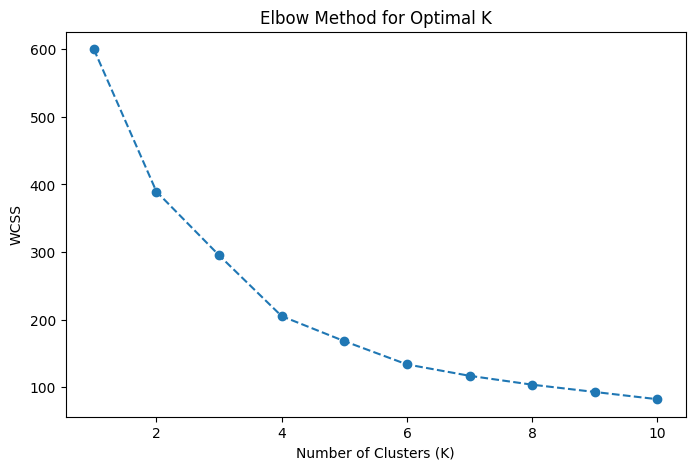

In [25]:
#Plotting Elbow Graph
plt.figure(figsize=(8,5))
plt.plot(K, wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()

In [26]:
#Calculating silhouette scores for different cluster numbers
silhouette_scores =[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k, random_state=42, n_init=10)
    labels=kmeans.fit_predict(df_scaled)
    silhouette_scores.append(silhouette_score(df_scaled, labels))

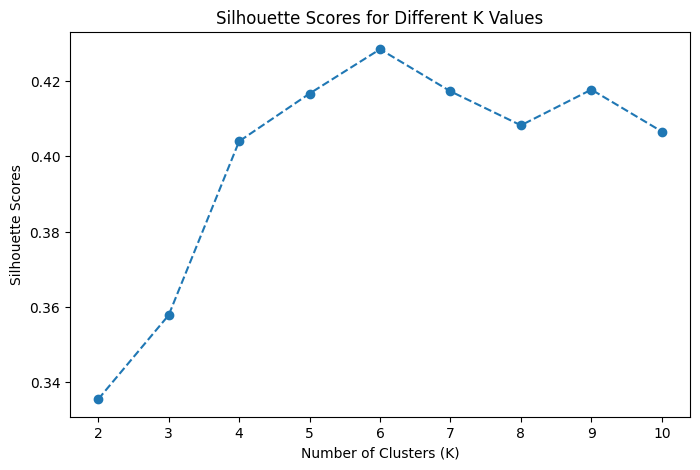

In [27]:
#Plotting silhouette scores
plt.figure(figsize=(8,5))
plt.plot(range(2,11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Scores")
plt.title("Silhouette Scores for Different K Values")
plt.show()

### Applying K-Means CLustering

In [28]:
#K-Means with the chosen K
optimal_k=3
kmeans=KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster']=kmeans.fit_predict(df_scaled)

#First few rows with cluster labels
print(df.head())

   CustomerID  Gender  Age  Annual_Income_(k$)  Spending_Score  Cluster
0           1    Male   19                  15              39        0
1           2    Male   21                  15              81        0
2           3  Female   20                  16               6        0
3           4  Female   23                  16              77        0
4           5  Female   31                  17              40        0


### Visualization

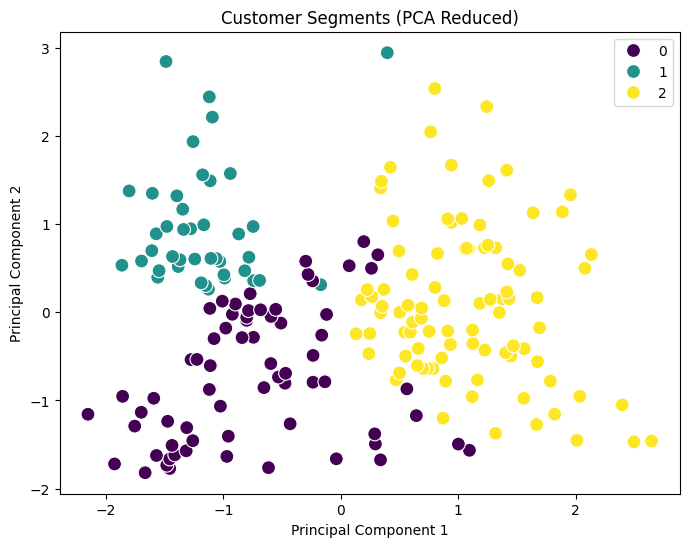

In [31]:
#Reduce dimensions to 2 using PCA for visualization
pca=PCA(n_components=2)
df_pca=pca.fit_transform(df_scaled)
df_pca=pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca['Cluster']=df['Cluster']

#Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=100)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Customer Segments (PCA Reduced)")
plt.legend()
plt.show()

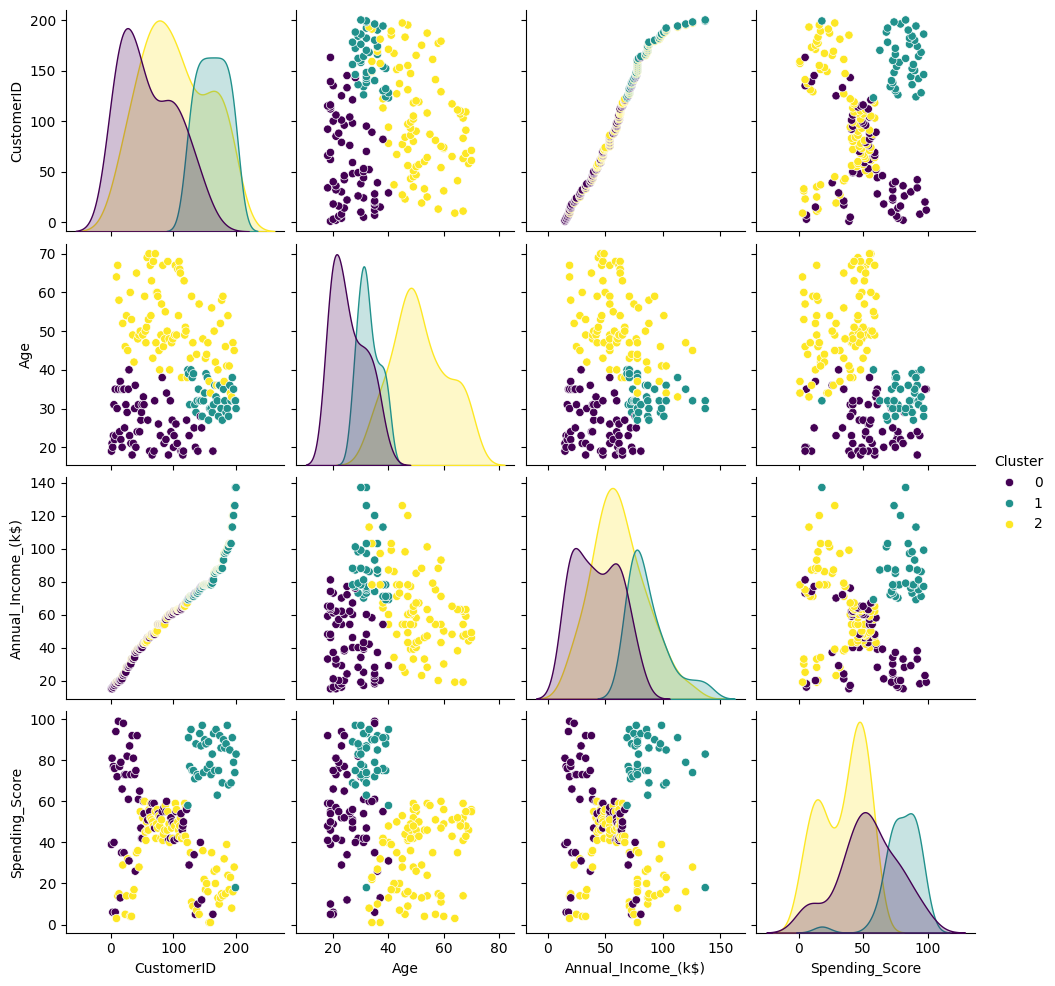

In [32]:
#Pair plot to see relationship
sns.pairplot(df, hue='Cluster', palette='viridis')
plt.show()

In [33]:
# Saving the Dataset with Cluster Labels
df.to_csv("customer_segmented_data.csv", index=False)

Final Insights-

1. Identified 3-5 customer clusters based on income and spending behavior.
2. High-income, high-spending customers should be targeted with premium products and loyalty programs.
3. Low-income, high-spending customers need discounts, installment plans, and promotions.
4. Middle-class balanced spenders can be engaged with upselling strategies and standard offers.
5. High-income, low-spending customers require personalized offers and engagement programs.
6. Low-income, low-spending customers should receive budget-friendly deals and seasonal discounts.
7. Younger customers (18-30) tend to spend more, while middle-aged (30-50) are more conservative.
8. PCA visualization showed clear customer segmentation, validating the clusters.
9. Elbow Method & Silhouette Score confirmed optimal clusters (around 3-5) for meaningful insights.
10. Businesses can improve customer engagement and maximize revenue by tailoring marketing strategies based on segmentation.